In [1]:
import numpy as np
from powerspectra import Powerspectra
from bias import Bias
from cosmology import Cosmology
from noise import Noise
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
import vector
import time
from qe import QE
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

In [2]:
_qe = QE()
_noise = Noise()
N0_file = "cache/_N0/N0_my_SO_14_14_T.npy"
_noise.setup_cmb_noise(N0_file, 0)
_cosmo = Cosmology()

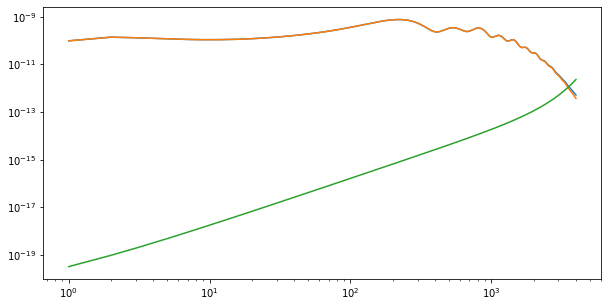

In [3]:
Ls = np.arange(1,4001)
plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].lenCl_spline(Ls)/(2*np.pi))
# plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].unlenCl_spline(Ls)/(2*np.pi))
plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].gradCl_spline(Ls)/(2*np.pi))
plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].N_spline(Ls)/(2*np.pi))

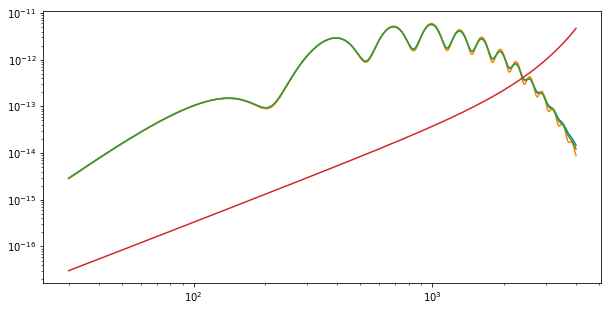

In [4]:
Ls = np.arange(30,4000)
plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].lenCl_spline(Ls)/(2*np.pi))
plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].unlenCl_spline(Ls)/(2*np.pi))
plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].gradCl_spline(Ls)/(2*np.pi))
plt.loglog(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].N_spline(Ls)/(2*np.pi))

In [5]:
Ls = np.arange(30, 4001, 10)
N0 = _qe.normalisation("TT", Ls, curl=False, resp_ps="lensed")

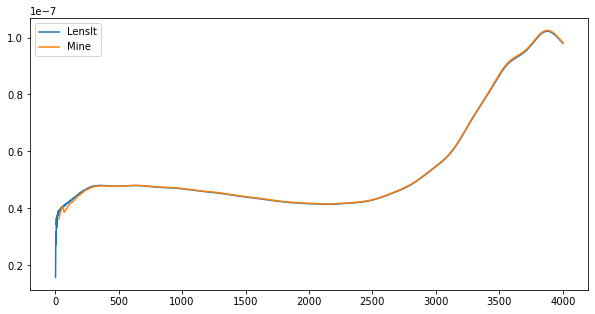

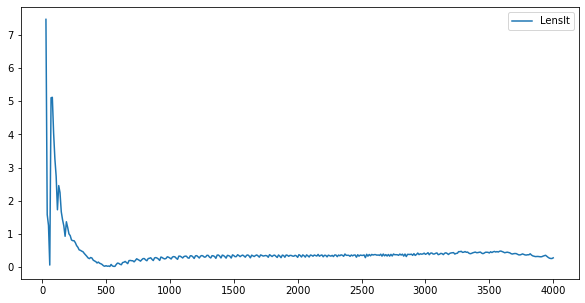

In [6]:
N0_file = "cache/_N0/N0_my_SO_14_14_T.npy"
_noise.setup_cmb_noise(N0_file, 0)
N0_lensit = _noise.get_N0("phi", 4000, tidy=True, ell_factors=True)
ells = np.arange(np.size(N0_lensit))
plt.plot(ells[3:], N0_lensit[3:], label="LensIt")
plt.plot(Ls, (Ls)**4 *N0/4, label="Mine")
plt.legend()
plt.figure()
plt.plot(Ls, 100*np.abs(N0_lensit[Ls] - ((Ls)**4 *N0/4))/N0_lensit[Ls], label="LensIt")
plt.legend()
plt.show()

In [7]:
Ls = np.arange(30, 4001, 10)
N0 = _qe.normalisation("TT", Ls, curl=False, resp_ps="gradient")

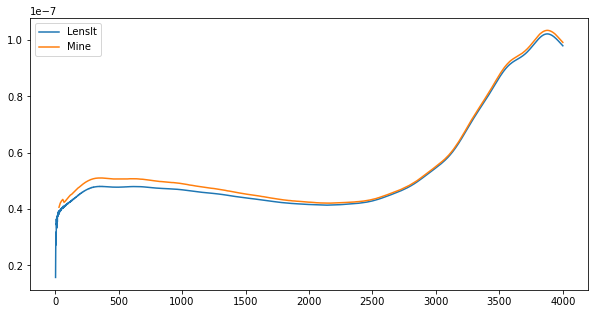

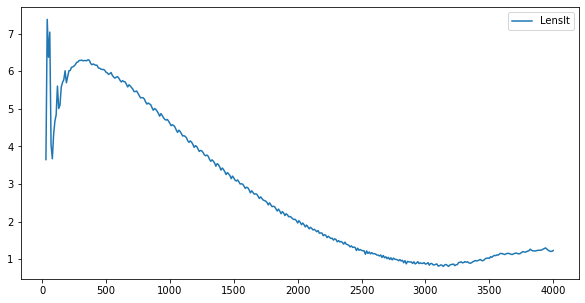

In [8]:
N0_file = "cache/_N0/N0_my_SO_14_14_T.npy"
_noise.setup_cmb_noise(N0_file, 0)
N0_lensit = _noise.get_N0("phi", 4000, tidy=True, ell_factors=True)
ells = np.arange(np.size(N0_lensit))
plt.plot(ells[3:], N0_lensit[3:], label="LensIt")
plt.plot(Ls, (Ls)**4 *N0/4, label="Mine")
plt.legend()
plt.figure()
plt.plot(Ls, 100*np.abs(N0_lensit[Ls] - ((Ls)**4 *N0/4))/N0_lensit[Ls], label="LensIt")
plt.legend()
plt.show()

In [9]:
Ls = np.arange(30, 4001, 10)
N0 = _qe.normalisation("TT", Ls, curl=True, resp_ps="lensed")

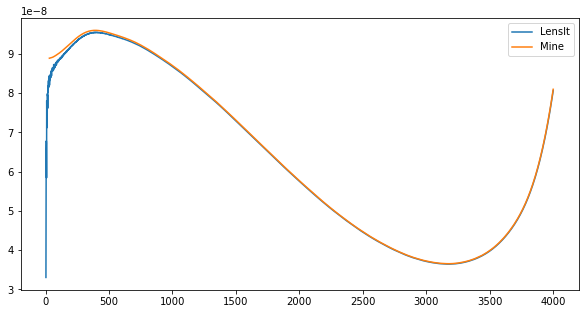

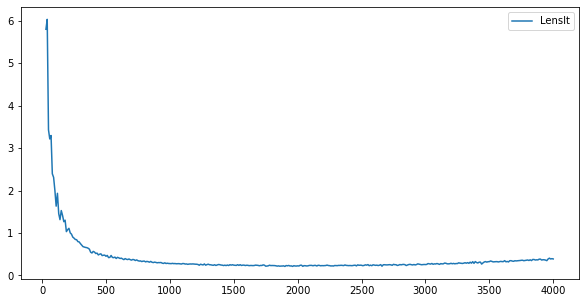

In [10]:
N0_file = "cache/_N0/N0_my_SO_14_14_T.npy"
_noise.setup_cmb_noise(N0_file, 0)
N0_lensit = _noise.get_N0("curl", 4000, tidy=True, ell_factors=True)
ells = np.arange(np.size(N0_lensit))
plt.plot(ells[3:], N0_lensit[3:], label="LensIt")
plt.plot(Ls, (Ls)**4 *N0/4, label="Mine")
plt.legend()
plt.figure()
plt.plot(Ls, 100*np.abs(N0_lensit[Ls] - ((Ls)**4 *N0/4))/N0_lensit[Ls], label="LensIt")
plt.legend()
plt.show()

In [11]:
Ls = np.arange(30, 4001, 10)
N0 = _qe.gmv_normalisation(Ls, curl=False, fields="T", resp_ps="lensed")

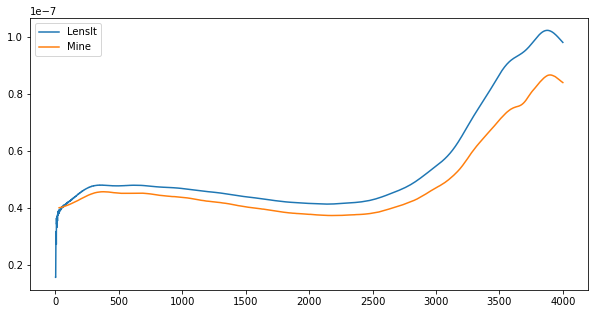

In [12]:
N0_file = "cache/_N0/N0_my_SO_14_14_T.npy"
_noise.setup_cmb_noise(N0_file, 0)
N0_lensit = _noise.get_N0("phi", 4000, tidy=True, ell_factors=True)
ells = np.arange(np.size(N0_lensit))
plt.plot(ells[2:], N0_lensit[2:], label="LensIt")
plt.plot(Ls, Ls**4 *N0/4, label="Mine")
plt.legend()
plt.show()

In [14]:
Ls = np.arange(30, 4001, 100)
N0 = _qe.normalisation("gmv", Ls, curl=False, resp_ps="lensed")

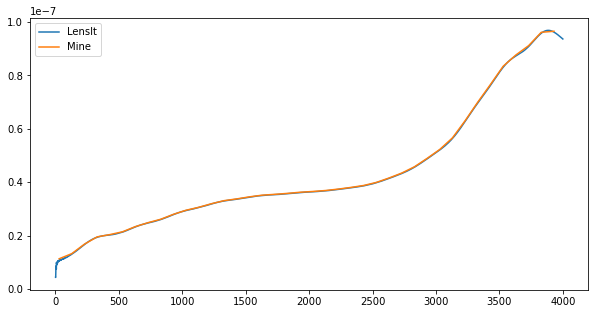

In [15]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
_noise.setup_cmb_noise(N0_file, 0)
N0_lensit = _noise.get_N0("phi", 4000, tidy=True, ell_factors=True)
ells = np.arange(np.size(N0_lensit))
plt.plot(ells[2:], N0_lensit[2:], label="LensIt")
plt.plot(Ls, Ls**4 *N0/4, label="Mine")
plt.legend()
plt.show()

In [13]:
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
bias = Bias(N0_file, M_path="cache/_M")
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[TT, TE, TB], [ET, EE, EB], [BT, BE, BB]])
Time = 76.734543800354


In [14]:
samp1 = np.arange(30, 40, 10)
samp2 = np.logspace(1, 3, 10) * 4
Ls = np.concatenate((samp1, samp2))
print(Ls)

[  30.           40.           66.72402149  111.30237609  185.66355334
  309.70547307  516.61986601  861.77387601 1437.52546552 2397.93700128
 4000.        ]


In [15]:
omega_Ls, omega_ps = Cosmology().get_postborn_omega_ps(ellmax=8000)

In [16]:
t0 = time.time()
N_A1_curl_TT, N_C1_curl_TT = bias.bias("TT", Ls,N_L1=30, N_L3=70, Ntheta12=25, Ntheta13=30)
t1 = time.time()
print(f"time: {t1-t0}")

time: 224.2164661884308


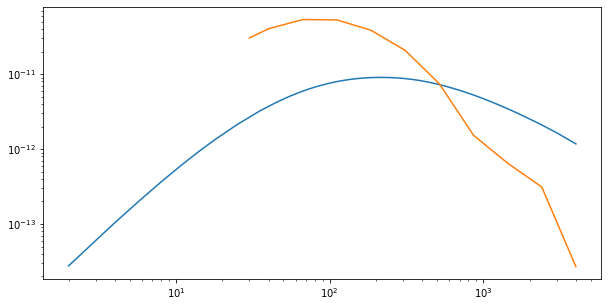

In [17]:
plt.loglog(omega_Ls, omega_ps)
plt.loglog(Ls, Ls**2*np.abs(N_A1_curl_TT+N_C1_curl_TT)/2)
plt.show()

In [25]:
t0 = time.time()
N_A1_curl_EB, N_C1_curl_EB = bias.bias("EB", Ls,N_L1=30, N_L3=70, Ntheta12=25, Ntheta13=30)
t1 = time.time()
print(f"time: {t1-t0}")

time: 531.2489929199219


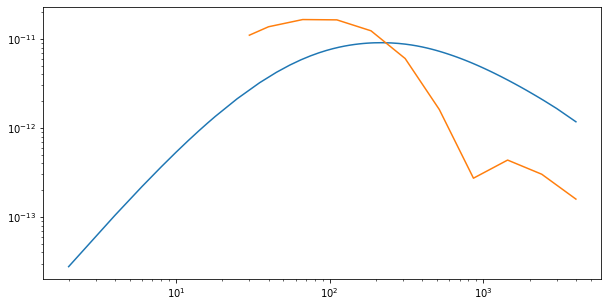

In [26]:
plt.loglog(omega_Ls, omega_ps)
plt.loglog(Ls, Ls**2*np.abs(N_A1_curl_EB+N_C1_curl_EB)/2)
plt.show()

In [27]:
t0 = time.time()
N_A1_curl_gmv, N_C1_curl_gmv = bias.bias("gmv", Ls,N_L1=30, N_L3=70, Ntheta12=25, Ntheta13=30)
t1 = time.time()
print(f"time: {t1-t0}")

time: 7752.840602874756


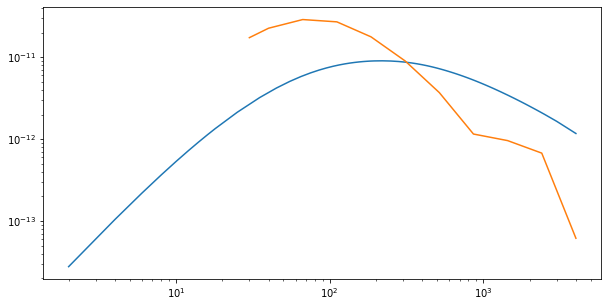

In [28]:
plt.loglog(omega_Ls, omega_ps)
plt.loglog(Ls, Ls**2*np.abs(N_A1_curl_gmv+N_C1_curl_gmv)/2)
plt.show()

In [14]:
t0 = time.time()
N_A1_curl_gmv1, N_C1_curl_gmv1 = bias.bias("gmv", Ls,N_L1=30, N_L3=70, Ntheta12=25, Ntheta13=30)
t1 = time.time()
print(f"time: {t1-t0}")

time: 8022.916054010391


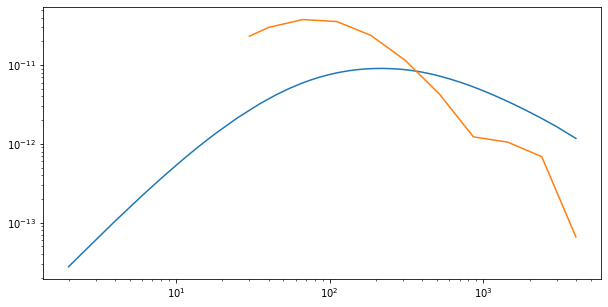

In [15]:
plt.loglog(omega_Ls, omega_ps)
plt.loglog(Ls, Ls**2*np.abs(N_A1_curl_gmv1+N_C1_curl_gmv1)/2)
plt.show()

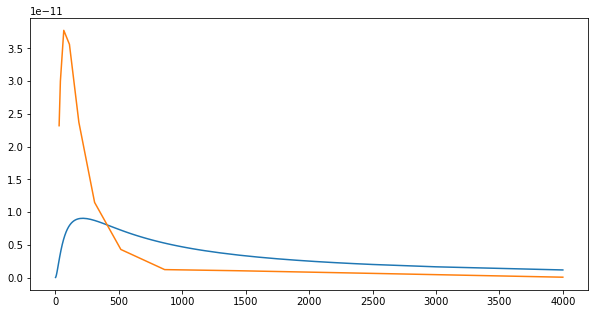

In [17]:
plt.plot(omega_Ls, omega_ps)
plt.plot(Ls, Ls**2*np.abs(N_A1_curl_gmv1+N_C1_curl_gmv1)/2)
plt.show()